Epoch 0, Loss 1.321918
Epoch 500, Loss 0.093832
Epoch 1000, Loss 0.061432
Epoch 1500, Loss 0.053821
Epoch 2000, Loss 0.049471
Epoch 2500, Loss 0.035210
Epoch 3000, Loss 0.008954
Epoch 3500, Loss 0.000364
Epoch 4000, Loss 0.000191
Epoch 4500, Loss 0.000157


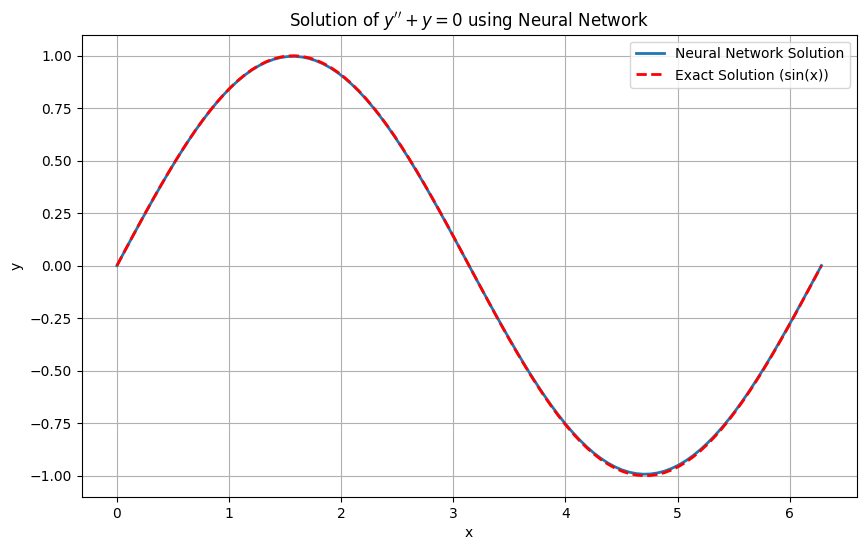

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(1, 5)
        self.hidden2 = nn.Linear(5, 5)
        self.output = nn.Linear(5, 1)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.output(x)
        return x

# Initialize the neural network
model = Net()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training data: sample points in the domain
x_train = torch.linspace(0, 2 * torch.pi, 100, requires_grad=True).unsqueeze(1)

# Training loop
num_epochs = 5000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(x_train)

    # Compute first and second derivatives
    dy_dx = torch.autograd.grad(
        y_pred, x_train, torch.ones_like(y_pred), create_graph=True
    )[0]
    d2y_dx2 = torch.autograd.grad(
        dy_dx, x_train, torch.ones_like(dy_dx), create_graph=True
    )[0]

    # Differential equation residual
    equation = d2y_dx2 + y_pred

    # Boundary conditions at x = 0
    x0 = torch.tensor([[0.0]], requires_grad=True)
    y0 = model(x0)
    dy0_dx = torch.autograd.grad(
        y0, x0, torch.ones_like(y0), create_graph=True
    )[0]

    # Loss function: MSE of differential equation residual and boundary conditions
    loss_eq = torch.mean(equation ** 2)
    loss_bc = (y0[0][0]) ** 2 + (dy0_dx[0][0] - 1) ** 2
    loss = loss_eq + loss_bc

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss every 500 epochs
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss {loss.item():.6f}')

# Plot the results
x_test = torch.linspace(0, 2 * torch.pi, 100).unsqueeze(1)
with torch.no_grad():
    y_test = model(x_test)
y_true = torch.sin(x_test)

plt.figure(figsize=(10, 6))
plt.plot(x_test.numpy(), y_test.numpy(), label='Neural Network Solution', linewidth=2)
plt.plot(x_test.numpy(), y_true.numpy(), 'r--', label='Exact Solution (sin(x))', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Solution of $y\'\' + y = 0$ using Neural Network')
plt.grid(True)
plt.show()


In [1]:
from kan import *

In [2]:
import torch
import torch.nn as nn

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from kan.utils import ex_round


# Initialize the neural network
modelSin = KAN(width=[1,1], grid=5, k=3, seed=42)



    

# Define the optimizer
optimizer = optim.Adam(modelSin.parameters(), lr=0.001)

# Training data: sample points in the domain
x_train = torch.linspace(0, 2 * torch.pi, 100, requires_grad=True).unsqueeze(1)

# Training loop
num_epochs = 100



for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = modelSin(x_train)

    # Compute first and second derivatives
    dy_dx = torch.autograd.grad(
        y_pred, x_train, torch.ones_like(y_pred), create_graph=True
    )[0]
    d2y_dx2 = torch.autograd.grad(
        dy_dx, x_train, torch.ones_like(dy_dx), create_graph=True
    )[0]

    # Differential equation residual
    equation = d2y_dx2 + y_pred

    # Boundary conditions at x = 0
    x0 = torch.tensor([[0.0]], requires_grad=True)
    y0 = modelSin(x0)
    dy0_dx = torch.autograd.grad(
        y0, x0, torch.ones_like(y0), create_graph=True
    )[0]

    # Loss function: MSE of differential equation residual and boundary conditions
    loss_eq = torch.mean(equation ** 2)
    loss_bc = (y0[0][0]) ** 2 + (dy0_dx[0][0] - 1) ** 2
    loss = loss_eq + loss_bc

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss every 500 epochs
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss {loss.item():.6f}')

modelSin.fix_symbolic(0,0,0,'sin')




checkpoint directory created: ./model
saving model version 0.0
Epoch 0, Loss 4.331208


/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:798: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:808: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:809: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (inpu

Best value at boundary.
r2 is 0.0
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.1


tensor(0., grad_fn=<SelectBackward0>)

/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:798: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:808: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
/Users/justinas/.pyenv/versions/3.9.19/lib/python3.9/site-packages/kan/MultKAN.py:809: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (inpu

Epoch 0, Loss 1.999976
Epoch 500, Loss 0.268149
Epoch 1000, Loss 0.079156
Epoch 1500, Loss 0.002149
Epoch 2000, Loss 0.000008
Epoch 2500, Loss 0.000000
Epoch 3000, Loss 0.000000
Epoch 3500, Loss 0.000000
Epoch 4000, Loss 0.000000
Epoch 4500, Loss 0.000000
Epoch 5000, Loss 0.000000
Epoch 5500, Loss 0.000000
Epoch 6000, Loss 0.000000
Epoch 6500, Loss 0.000000
Epoch 7000, Loss 0.000000
Epoch 7500, Loss 0.000000


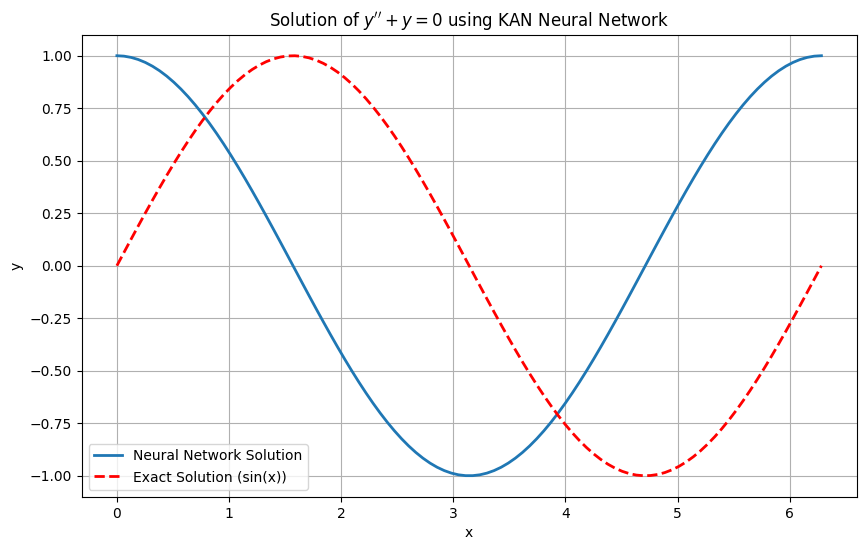

In [88]:
num_epochs = 3000



for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = modelSin(x_train)

    # Compute first and second derivatives
    dy_dx = torch.autograd.grad(
        y_pred, x_train, torch.ones_like(y_pred), create_graph=True
    )[0]
    d2y_dx2 = torch.autograd.grad(
        dy_dx, x_train, torch.ones_like(dy_dx), create_graph=True
    )[0]

    # Differential equation residual
    equation = d2y_dx2 + y_pred

    # Boundary conditions at x = 0
    x0 = torch.tensor([[0.0]], requires_grad=True)
    y0 = modelSin(x0)
    dy0_dx = torch.autograd.grad(
        y0, x0, torch.ones_like(y0), create_graph=True
    )[0]

    # Loss function: MSE of differential equation residual and boundary conditions
    loss_eq = torch.mean(equation ** 2)
    loss_bc = (y0[0][0]-1) ** 2 + (dy0_dx[0][0] ) ** 2
    loss = loss_eq + loss_bc

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss every 500 epochs
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss {loss.item():.6f}')        

# Plot the results
x_test = torch.linspace(0, 2 * torch.pi, 100).unsqueeze(1)
with torch.no_grad():
    y_test = modelSin(x_test)
y_true = torch.sin(x_test)

plt.figure(figsize=(10, 6))
plt.plot(x_test.numpy(), y_test.numpy(), label='Neural Network Solution', linewidth=2)
plt.plot(x_test.numpy(), y_true.numpy(), 'r--', label='Exact Solution (sin(x))', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Solution of $y\'\' + y = 0$ using KAN Neural Network')
plt.grid(True)
plt.show()


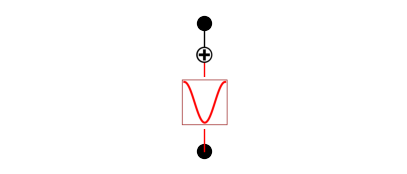

In [89]:
modelSin.plot()

In [91]:
10.9955720901489/np.pi

3.4999993005409613

In [90]:
modelSin.symbolic_formula()

([9.03778882843653e-8 - 0.999999821186066*sin(1.0*x_1 + 10.9955720901489)],
 [x_1])

In [46]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    modelSin.fix_symbolic(0,0,0,'sin');
    modelSin.fix_symbolic(0,1,0,'x^2');
    modelSin.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    modelSin.auto_symbolic(lib=lib)
modelSin.symbolic_formula()

skipping (0,0,0) since already symbolic
fixing (0,0,1) with abs, r2=0.9995433688163757, c=3
fixing (1,0,0) with exp, r2=0.99998539686203, c=2
fixing (1,1,0) with sin, r2=0.9995855689048767, c=2
saving model version 0.4


([-0.0725043492286987*exp(0.00491052257253005*sin(9.56752014160156*x_1 - 3.89791989326477)) - 0.896171092987061*sin(0.259228114115469*Abs(3.75271987915039*x_1 - 5.52943992614746) - 1.4871930391411) + 0.100127797573805],
 [x_1])

In [55]:
 9.42477989196777/np.pi

3.0000006147195397

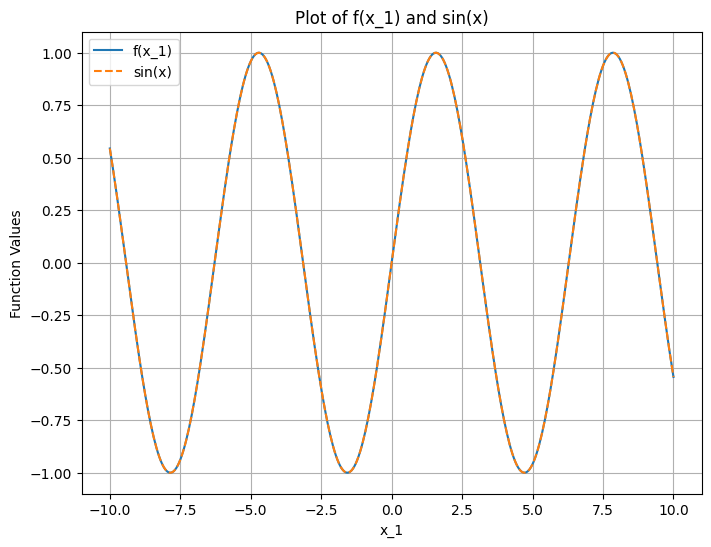

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Define the given function
def f(x_1):
    return (9.46518775890581e-6 - 0.99999725818634*np.sin(1.0000022649765*x_1 + 9.42477989196777))

# Define the sine function
def sine_function(x):
    return np.sin(x)

# Generate x values
x_values = np.linspace(-10, 10, 400)

# Compute y values for the given function and sine function
y_values = f(x_values)
sine_values = sine_function(x_values)

# Plot both functions on the same plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='f(x_1)')
plt.plot(x_values, sine_values, label='sin(x)', linestyle='--')
plt.title('Plot of f(x_1) and sin(x)')
plt.xlabel('x_1')
plt.ylabel('Function Values')
plt.grid(True)
plt.legend()
plt.show()


Epoch [1000/10000], Loss: 0.0048
Epoch [2000/10000], Loss: 0.0001
Epoch [3000/10000], Loss: 0.0000
Epoch [4000/10000], Loss: 0.0000
Epoch [5000/10000], Loss: 0.0000
Epoch [6000/10000], Loss: 0.0000
Epoch [7000/10000], Loss: 0.0000
Epoch [8000/10000], Loss: 0.0000
Epoch [9000/10000], Loss: 0.0000
Epoch [10000/10000], Loss: 0.0000


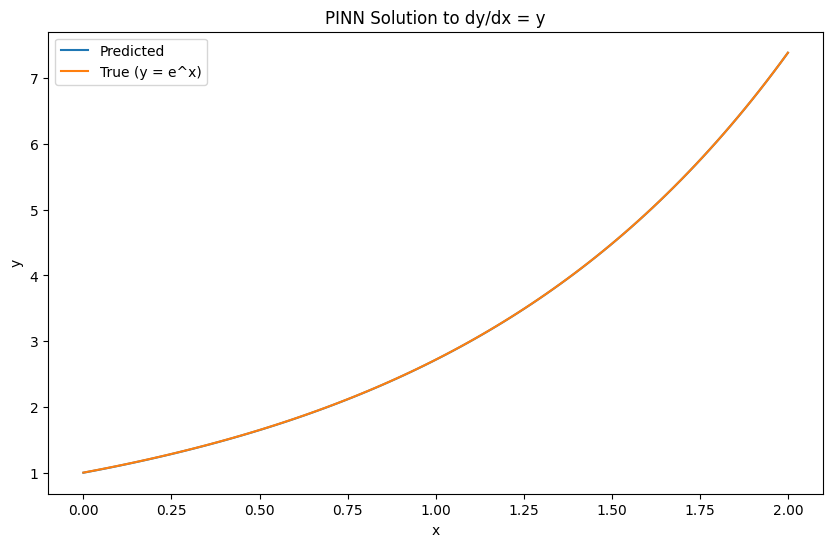

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden_layer1 = nn.Linear(1, 20)
        self.hidden_layer2 = nn.Linear(20, 20)
        self.output_layer = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.tanh(self.hidden_layer1(x))
        x = torch.tanh(self.hidden_layer2(x))
        x = self.output_layer(x)
        return x

def diff_equation(x, y):
    # Example: dy/dx = y (solution: y = Ce^x)
    dy_dx = torch.autograd.grad(y, x, grad_outputs=torch.ones_like(y), create_graph=True)[0]
    return dy_dx - y

def train(net, optimizer, epochs):
    for epoch in range(epochs):
        optimizer.zero_grad()
        
        # Sample points
        x = torch.linspace(0, 2, 100, requires_grad=True).view(-1, 1)
        y = net(x)
        
        # Compute loss
        mse_loss = torch.mean((diff_equation(x, y))**2)
        
        # Add boundary condition (y(0) = 1)
        bc_loss = (net(torch.tensor([[0.0]])) - 1.0)**2
        
        loss = mse_loss + bc_loss
        
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Create network and optimizer
net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the network
train(net, optimizer, 10000)

# Plot results
x = torch.linspace(0, 2, 100).view(-1, 1)
y_pred = net(x).detach().numpy()
y_true = torch.exp(x).numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y_pred, label='Predicted')
plt.plot(x, y_true, label='True (y = e^x)')
plt.legend()
plt.title('PINN Solution to dy/dx = y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define helper functions for complex arithmetic
def complex_mult(a, b):
    # Multiply two complex numbers a and b
    a_real, a_imag = a[..., 0], a[..., 1]
    b_real, b_imag = b[..., 0], b[..., 1]
    real = a_real * b_real - a_imag * b_imag
    imag = a_real * b_imag + a_imag * b_real
    return torch.stack([real, imag], dim=-1)

def complex_conj(a):
    # Complex conjugate of a
    a_real, a_imag = a[..., 0], a[..., 1]
    return torch.stack([a_real, -a_imag], dim=-1)

def complex_abs(a):
    # Absolute value (modulus) of a complex number
    a_real, a_imag = a[..., 0], a[..., 1]
    return torch.sqrt(a_real ** 2 + a_imag ** 2)

def complex_arg(a):
    # Argument (phase) of a complex number
    a_real, a_imag = a[..., 0], a[..., 1]
    return torch.atan2(a_imag, a_real)

def complex_pow_real(a, alpha):
    # Raise complex number a to a real power alpha
    abs_a = complex_abs(a)
    arg_a = complex_arg(a)
    abs_result = abs_a ** alpha
    arg_result = arg_a * alpha
    real = abs_result * torch.cos(arg_result)
    imag = abs_result * torch.sin(arg_result)
    return torch.stack([real, imag], dim=-1)

def complex_add(a, b):
    # Add two complex numbers a and b
    return torch.stack([a[..., 0] + b[..., 0], a[..., 1] + b[..., 1]], dim=-1)

def complex_subtract(a, b):
    # Subtract complex number b from a
    return torch.stack([a[..., 0] - b[..., 0], a[..., 1] - b[..., 1]], dim=-1)

def complex_abs_squared(a):
    # Square of the modulus of a complex number
    a_real, a_imag = a[..., 0], a[..., 1]
    return a_real ** 2 + a_imag ** 2

# Define the neural network model for the four-point function
class FourPointFunctionNet(nn.Module):
    def __init__(self, hidden_size=50):
        super(FourPointFunctionNet, self).__init__()
        self.fc1 = nn.Linear(2, hidden_size)  # Input: [Re(Z), Im(Z)]
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 2)  # Output: [Re(F(Z)), Im(F(Z))]

    def forward(self, x):
        # Forward pass of the neural network
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x  # Output is [Re(F(Z)), Im(F(Z))]

# Define the loss function based on the crossing equation
def loss_function(model, Z, Delta_phi):
    # Z: Tensor of shape (batch_size, 2) with [Re(Z), Im(Z)]
    # Delta_phi: Scaling dimension of the primary field
    device = Z.device

    # Compute F(Z)
    F_Z = model(Z)

    # Compute Zb = conjugate of Z
    Zb = complex_conj(Z)

    # Compute Z * Zb
    Z_Zb = complex_mult(Z, Zb)

    # Compute (Z * Zb)^(-Delta_phi)
    factor1 = complex_pow_real(Z_Zb, -Delta_phi)

    # Multiply factor1 * F(Z)
    term1 = complex_mult(factor1, F_Z)

    # Compute 1 - Z
    one = torch.tensor([1.0, 0.0], dtype=Z.dtype, device=device).expand_as(Z)
    one_minus_Z = complex_subtract(one, Z)

    # Compute F(1 - Z)
    F_one_minus_Z = model(one_minus_Z)

    # Compute (1 - Zb) = conjugate of (1 - Z)
    one_minus_Zb = complex_conj(one_minus_Z)

    # Compute (1 - Z)(1 - Zb)
    denom = complex_mult(one_minus_Z, one_minus_Zb)

    # Compute ((1 - Z)(1 - Zb))^(-Delta_phi)
    factor2 = complex_pow_real(denom, -Delta_phi)

    # Multiply factor2 * F(1 - Z)
    term2 = complex_mult(factor2, F_one_minus_Z)

    # Compute the difference term1 - term2
    diff = complex_subtract(term1, term2)

    # Compute the squared modulus of the difference
    loss = complex_abs_squared(diff)

    # Return the mean loss over the batch
    return loss.mean()

# Training parameters
Delta_phi = 0.5  # Example value for the scaling dimension
learning_rate = 1e-3
num_epochs = 1000
batch_size = 64

# Initialize the model, optimizer, and loss function
model = FourPointFunctionNet(hidden_size=50)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Generate training data: sample Z values in the complex upper half-plane
def generate_training_data(batch_size):
    # Sample Re(Z) uniformly between 0 and 1
    Re_Z = torch.rand(batch_size)

    # Sample Im(Z) uniformly between 0 and 1
    Im_Z = torch.rand(batch_size)

    # Ensure Im(Z) > 0 to stay in the upper half-plane
    Im_Z = Im_Z + 0.1  # Shift to avoid zero

    Z = torch.stack([Re_Z, Im_Z], dim=-1)
    return Z

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Generate a batch of training data
    Z = generate_training_data(batch_size)

    # Compute the loss
    loss = loss_function(model, Z, Delta_phi)

    # Backpropagation and optimization
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.6f}")

print("Training complete.")


Epoch [100/1000], Loss: 0.000019
Epoch [200/1000], Loss: 0.000010
Epoch [300/1000], Loss: 0.000004
Epoch [400/1000], Loss: 0.000003
Epoch [500/1000], Loss: 0.000004
Epoch [600/1000], Loss: 0.000003
Epoch [700/1000], Loss: 0.000002
Epoch [800/1000], Loss: 0.000002
Epoch [900/1000], Loss: 0.000002
Epoch [1000/1000], Loss: 0.000001
Training complete.


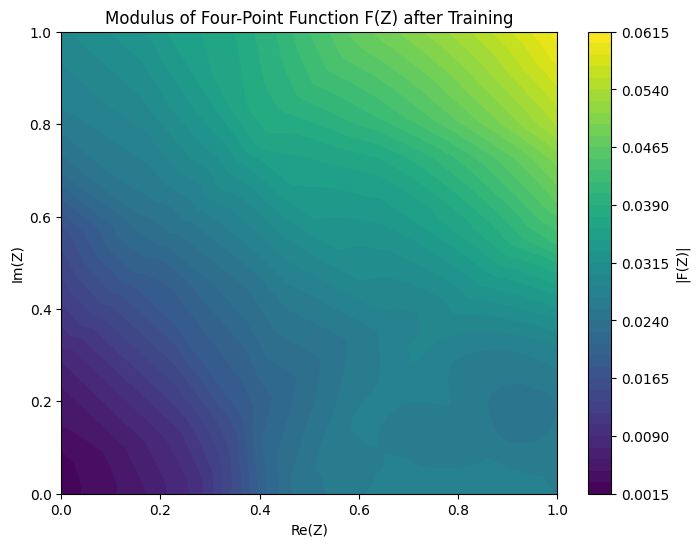

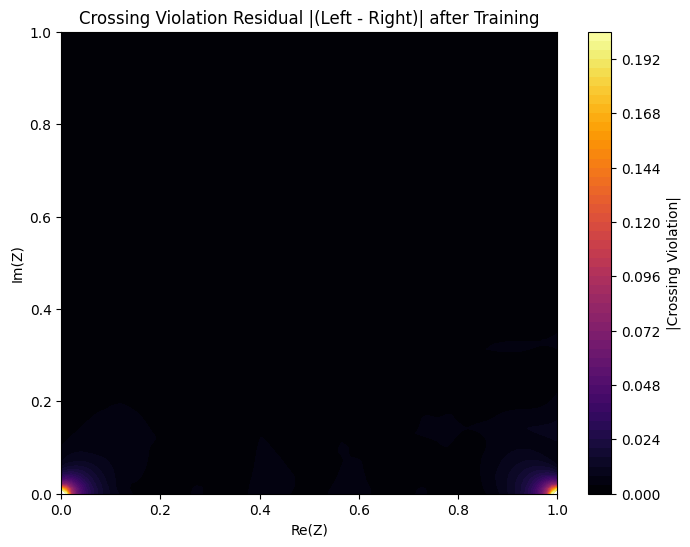

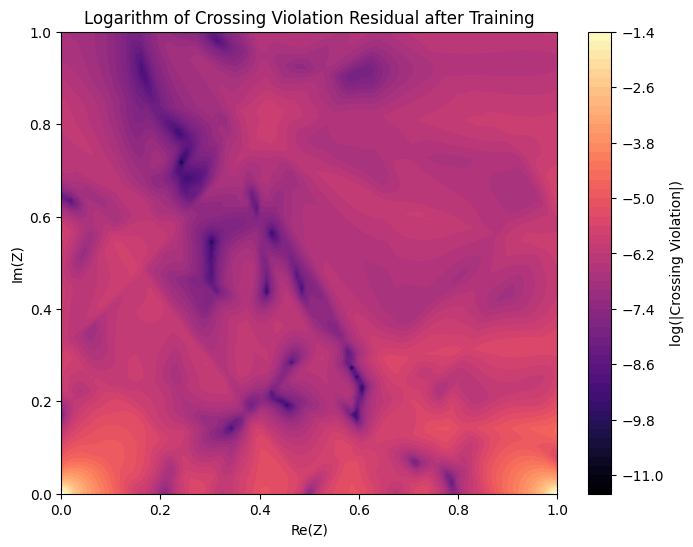

In [11]:
# Plotting the function after training
# Generate a grid of Z values
grid_size = 100
Re_Z = torch.linspace(0, 1, grid_size)
Im_Z = torch.linspace(0, 1, grid_size)
Re_Z_grid, Im_Z_grid = torch.meshgrid(Re_Z, Im_Z)
Z_grid = torch.stack([Re_Z_grid.flatten(), Im_Z_grid.flatten()], dim=-1)

# Compute F(Z) on the grid
model.eval()
with torch.no_grad():
    F_Z_grid = model(Z_grid)

# Compute the modulus of F(Z)
F_Z_modulus = complex_abs(F_Z_grid).reshape(grid_size, grid_size)

# Compute the crossing violation on the grid
# Compute (Z Zb)^-Delta_phi * F(Z) - ((1-Z)(1-Zb))^-Delta_phi * F(1-Z,1-Zb)
def compute_crossing_violation(model, Z, Delta_phi):
    F_Z = model(Z)
    Zb = complex_conj(Z)
    Z_Zb = complex_mult(Z, Zb)
    factor1 = complex_pow_real(Z_Zb, -Delta_phi)
    term1 = complex_mult(factor1, F_Z)
    one = torch.tensor([1.0, 0.0], dtype=Z.dtype, device=Z.device).expand_as(Z)
    one_minus_Z = complex_subtract(one, Z)
    F_one_minus_Z = model(one_minus_Z)
    one_minus_Zb = complex_conj(one_minus_Z)
    denom = complex_mult(one_minus_Z, one_minus_Zb)
    factor2 = complex_pow_real(denom, -Delta_phi)
    term2 = complex_mult(factor2, F_one_minus_Z)
    diff = complex_subtract(term1, term2)
    return diff  # Complex residual

with torch.no_grad():
    residual = compute_crossing_violation(model, Z_grid, Delta_phi)
    residual_modulus = complex_abs(residual).reshape(grid_size, grid_size)

# Convert to numpy for plotting
Re_Z_grid_np = Re_Z_grid.numpy()
Im_Z_grid_np = Im_Z_grid.numpy()
F_Z_modulus_np = F_Z_modulus.numpy()
residual_modulus_np = residual_modulus.numpy()

# Plot the modulus of F(Z)
plt.figure(figsize=(8, 6))
plt.contourf(Re_Z_grid_np, Im_Z_grid_np, F_Z_modulus_np, levels=50, cmap='viridis')
plt.colorbar(label='|F(Z)|')
plt.xlabel('Re(Z)')
plt.ylabel('Im(Z)')
plt.title('Modulus of Four-Point Function F(Z) after Training')
plt.show()

# Plot the modulus of the crossing violation
plt.figure(figsize=(8, 6))
plt.contourf(Re_Z_grid_np, Im_Z_grid_np, residual_modulus_np, levels=50, cmap='inferno')
plt.colorbar(label='|Crossing Violation|')
plt.xlabel('Re(Z)')
plt.ylabel('Im(Z)')
plt.title('Crossing Violation Residual |(Left - Right)| after Training')
plt.show()

# Optional: Plot logarithm of the residual to better visualize small violations
epsilon = 1e-10  # To avoid log(0)
log_residual_modulus_np = np.log(residual_modulus_np + epsilon)

plt.figure(figsize=(8, 6))
plt.contourf(Re_Z_grid_np, Im_Z_grid_np, log_residual_modulus_np, levels=50, cmap='magma')
plt.colorbar(label='log(|Crossing Violation|)')
plt.xlabel('Re(Z)')
plt.ylabel('Im(Z)')
plt.title('Logarithm of Crossing Violation Residual after Training')
plt.show()

In [87]:
grid_size

400

checkpoint directory created: ./model
saving model version 0.0
Epoch [100/2000], Loss: 0.000075
Epoch [200/2000], Loss: 0.000015
Epoch [300/2000], Loss: 0.000016
Epoch [400/2000], Loss: 0.000010
Epoch [500/2000], Loss: 0.000012
Epoch [600/2000], Loss: 0.000010
Epoch [700/2000], Loss: 0.000007
Epoch [800/2000], Loss: 0.000006
Epoch [900/2000], Loss: 0.000006
Epoch [1000/2000], Loss: 0.000005
Epoch [1100/2000], Loss: 0.000004
Epoch [1200/2000], Loss: 0.000003
Epoch [1300/2000], Loss: 0.000002
Epoch [1400/2000], Loss: 0.000002
Epoch [1500/2000], Loss: 0.000002
Epoch [1600/2000], Loss: 0.000003
Epoch [1700/2000], Loss: 0.000002
Epoch [1800/2000], Loss: 0.000002
Epoch [1900/2000], Loss: 0.000002
Epoch [2000/2000], Loss: 0.000002
Training complete.


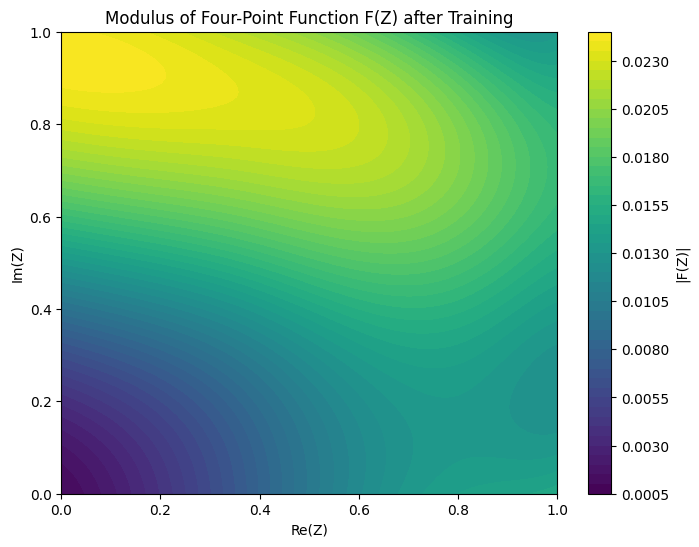

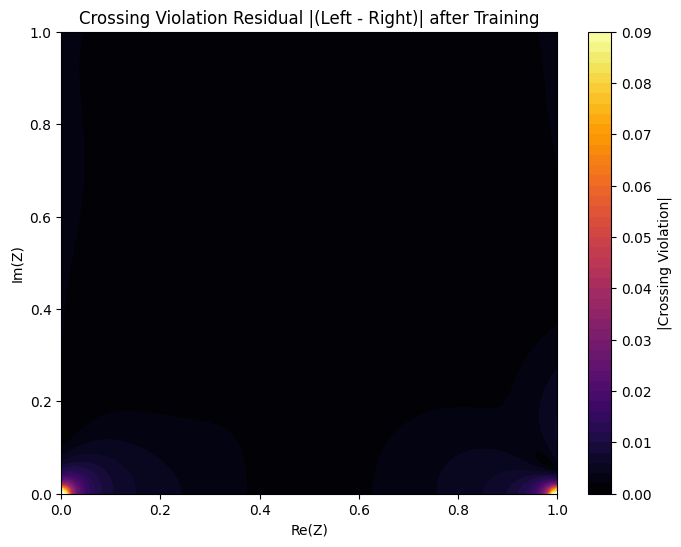

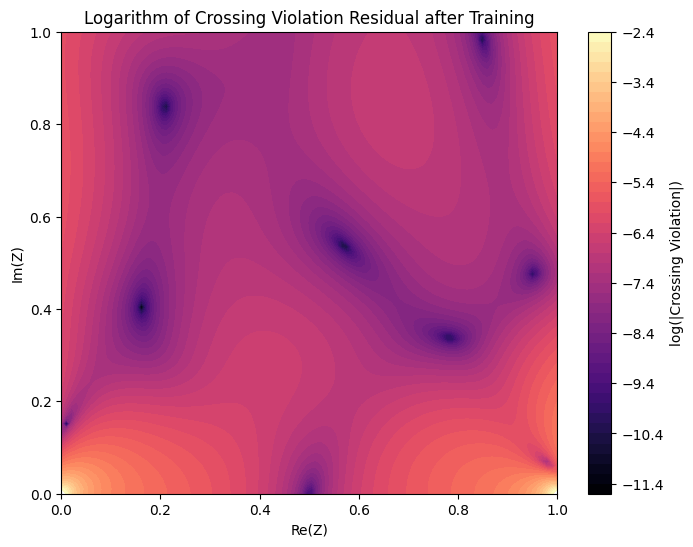

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from kan import *  # Assuming KAN is the class name in PyKAN

# Define helper functions for complex arithmetic
def complex_mult(a, b):
    """Multiply two complex numbers represented as [Re, Im]."""
    a_real, a_imag = a[..., 0], a[..., 1]
    b_real, b_imag = b[..., 0], b[..., 1]
    real = a_real * b_real - a_imag * b_imag
    imag = a_real * b_imag + a_imag * b_real
    return torch.stack([real, imag], dim=-1)

def complex_conj(a):
    """Complex conjugate of a complex number represented as [Re, Im]."""
    a_real, a_imag = a[..., 0], a[..., 1]
    return torch.stack([a_real, -a_imag], dim=-1)

def complex_abs(a):
    """Absolute value (modulus) of a complex number."""
    a_real, a_imag = a[..., 0], a[..., 1]
    return torch.sqrt(a_real ** 2 + a_imag ** 2)

def complex_arg(a):
    """Argument (phase) of a complex number."""
    a_real, a_imag = a[..., 0], a[..., 1]
    return torch.atan2(a_imag, a_real)

def complex_pow_real(a, alpha):
    """Raise complex number a to a real power alpha."""
    abs_a = complex_abs(a)
    arg_a = complex_arg(a)
    abs_result = abs_a ** alpha
    arg_result = arg_a * alpha
    real = abs_result * torch.cos(arg_result)
    imag = abs_result * torch.sin(arg_result)
    return torch.stack([real, imag], dim=-1)

def complex_add(a, b):
    """Add two complex numbers."""
    return torch.stack([a[..., 0] + b[..., 0], a[..., 1] + b[..., 1]], dim=-1)

def complex_subtract(a, b):
    """Subtract complex number b from a."""
    return torch.stack([a[..., 0] - b[..., 0], a[..., 1] - b[..., 1]], dim=-1)

def complex_abs_squared(a):
    """Square of the modulus of a complex number."""
    a_real, a_imag = a[..., 0], a[..., 1]
    return a_real ** 2 + a_imag ** 2




# Define the loss function based on the crossing equation
def loss_function(model, Z, Delta_phi):
    """
    Compute the loss based on the crossing equation:
    (Z Zb)^-Delta_phi * F(Z) - ((1 - Z)(1 - Zb))^-Delta_phi * F(1 - Z,1 - Zb) = 0

    Parameters:
    - model: The neural network model.
    - Z: Tensor of shape (batch_size, 2) with [Re(Z), Im(Z)].
    - Delta_phi: Scaling dimension of the primary field.
    """
    device = Z.device

    # Compute F(Z)
    F_Z = model(Z)  # Shape: (batch_size, 2)

    # Compute Zb = conjugate of Z
    Zb = complex_conj(Z)  # Shape: (batch_size, 2)

    # Compute Z * Zb
    Z_Zb = complex_mult(Z, Zb)  # Shape: (batch_size, 2)

    # Compute (Z * Zb)^(-Delta_phi)
    factor1 = complex_pow_real(Z_Zb, -Delta_phi)  # Shape: (batch_size, 2)

    # Multiply factor1 * F(Z)
    term1 = complex_mult(factor1, F_Z)  # Shape: (batch_size, 2)

    # Compute 1 - Z
    one = torch.tensor([1.0, 0.0], dtype=Z.dtype, device=device).expand_as(Z)
    one_minus_Z = complex_subtract(one, Z)  # Shape: (batch_size, 2)

    # Compute F(1 - Z)
    F_one_minus_Z = model(one_minus_Z)  # Shape: (batch_size, 2)

    # Compute (1 - Zb) = conjugate of (1 - Z)
    one_minus_Zb = complex_conj(one_minus_Z)  # Shape: (batch_size, 2)

    # Compute (1 - Z)(1 - Zb)
    denom = complex_mult(one_minus_Z, one_minus_Zb)  # Shape: (batch_size, 2)

    # Compute ((1 - Z)(1 - Zb))^(-Delta_phi)
    factor2 = complex_pow_real(denom, -Delta_phi)  # Shape: (batch_size, 2)

    # Multiply factor2 * F(1 - Z)
    term2 = complex_mult(factor2, F_one_minus_Z)  # Shape: (batch_size, 2)

    # Compute the difference term1 - term2
    diff = complex_subtract(term1, term2)  # Shape: (batch_size, 2)

    # Compute the squared modulus of the difference
    loss = complex_abs_squared(diff)  # Shape: (batch_size,)

    # Return the mean loss over the batch
    return loss.mean()

# Training parameters
Delta_phi = 0.5  # Example value for the scaling dimension
learning_rate = 1e-3
num_epochs = 2000
batch_size = 128

# Initialize the model, optimizer, and loss function
#model = FourPointFunctionKAN(width=[2, 5, 2], grid=3, k=3, seed=42)  # Output size set to 2 for [Re, Im]
model=KAN(width=[2, 5, 2], grid=3, k=3, seed=42)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Generate training data: sample Z values in the complex upper half-plane
def generate_training_data(batch_size):
    """
    Generate a batch of Z values in the complex plane.
    Ensures that Im(Z) > 0 to stay in the upper half-plane.
    """
    Re_Z = torch.rand(batch_size)
    Im_Z = torch.rand(batch_size) + 0.1  # Shift to avoid zero
    Z = torch.stack([Re_Z, Im_Z], dim=-1)
    return Z

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Generate a batch of training data
    Z = generate_training_data(batch_size)
    
    # Compute the loss
    loss = loss_function(model, Z, Delta_phi)
    
    # Backpropagation and optimization
    loss.backward()
    optimizer.step()
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.6f}")

print("Training complete.")

# Plotting the function after training
# Generate a grid of Z values
grid_size = 100
Re_Z = torch.linspace(0, 1, grid_size)
Im_Z = torch.linspace(0, 1, grid_size)
Re_Z_grid, Im_Z_grid = torch.meshgrid(Re_Z, Im_Z)
Z_grid = torch.stack([Re_Z_grid.flatten(), Im_Z_grid.flatten()], dim=-1)

# Compute F(Z) on the grid
model.eval()
with torch.no_grad():
    F_Z_grid = model(Z_grid)  # Shape: (grid_size**2, 2)

# Compute the modulus of F(Z)
F_Z_modulus = complex_abs(F_Z_grid).reshape(grid_size, grid_size)

# Compute the crossing violation on the grid
def compute_crossing_violation(model, Z, Delta_phi):
    """
    Compute the residual of the crossing equation for given Z.
    
    Parameters:
    - model: The neural network model.
    - Z: Tensor of shape (batch_size, 2) with [Re(Z), Im(Z)].
    - Delta_phi: Scaling dimension of the primary field.
    
    Returns:
    - diff: Complex residuals, shape (batch_size, 2).
    """
    F_Z = model(Z)
    Zb = complex_conj(Z)
    Z_Zb = complex_mult(Z, Zb)
    factor1 = complex_pow_real(Z_Zb, -Delta_phi)
    term1 = complex_mult(factor1, F_Z)
    one = torch.tensor([1.0, 0.0], dtype=Z.dtype, device=Z.device).expand_as(Z)
    one_minus_Z = complex_subtract(one, Z)
    F_one_minus_Z = model(one_minus_Z)
    one_minus_Zb = complex_conj(one_minus_Z)
    denom = complex_mult(one_minus_Z, one_minus_Zb)
    factor2 = complex_pow_real(denom, -Delta_phi)
    term2 = complex_mult(factor2, F_one_minus_Z)
    diff = complex_subtract(term1, term2)
    return diff  # Shape: (batch_size, 2)

with torch.no_grad():
    residual = compute_crossing_violation(model, Z_grid, Delta_phi)  # Shape: (grid_size**2, 2)
    residual_modulus = complex_abs(residual).reshape(grid_size, grid_size)

# Convert to numpy for plotting
Re_Z_grid_np = Re_Z_grid.numpy()
Im_Z_grid_np = Im_Z_grid.numpy()
F_Z_modulus_np = F_Z_modulus.numpy()
residual_modulus_np = residual_modulus.numpy()

# Plot the modulus of F(Z)
plt.figure(figsize=(8, 6))
contour_f = plt.contourf(Re_Z_grid_np, Im_Z_grid_np, F_Z_modulus_np, levels=50, cmap='viridis')
plt.colorbar(contour_f, label='|F(Z)|')
plt.xlabel('Re(Z)')
plt.ylabel('Im(Z)')
plt.title('Modulus of Four-Point Function F(Z) after Training')
plt.show()

# Plot the modulus of the crossing violation
plt.figure(figsize=(8, 6))
contour_residual = plt.contourf(Re_Z_grid_np, Im_Z_grid_np, residual_modulus_np, levels=50, cmap='inferno')
plt.colorbar(contour_residual, label='|Crossing Violation|')
plt.xlabel('Re(Z)')
plt.ylabel('Im(Z)')
plt.title('Crossing Violation Residual |(Left - Right)| after Training')
plt.show()

# Optional: Plot logarithm of the residual to better visualize small violations
epsilon = 1e-10  # To avoid log(0)
log_residual_modulus_np = np.log(residual_modulus_np + epsilon)

plt.figure(figsize=(8, 6))
contour_log_residual = plt.contourf(Re_Z_grid_np, Im_Z_grid_np, log_residual_modulus_np, levels=50, cmap='magma')
plt.colorbar(contour_log_residual, label='log(|Crossing Violation|)')
plt.xlabel('Re(Z)')
plt.ylabel('Im(Z)')
plt.title('Logarithm of Crossing Violation Residual after Training')
plt.show()


In [20]:
from kan.utils import ex_round
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)
    
model.symbolic_formula()




fixing (0,0,0) with sin, r2=0.9993572235107422, c=2
fixing (0,0,1) with sin, r2=0.9999696612358093, c=2
fixing (0,0,2) with sin, r2=0.9998999238014221, c=2
fixing (0,0,3) with x, r2=0.9999473690986633, c=1
fixing (0,0,4) with x^2, r2=0.9996988773345947, c=2
fixing (0,1,0) with sin, r2=0.9993182420730591, c=2
fixing (0,1,1) with sin, r2=0.9995968341827393, c=2
fixing (0,1,2) with sin, r2=0.9559618830680847, c=2
fixing (0,1,3) with x, r2=0.9891943335533142, c=1
fixing (0,1,4) with sin, r2=0.9404373168945312, c=2
fixing (1,0,0) with sin, r2=0.9999973773956299, c=2
fixing (1,0,1) with sin, r2=0.9999957084655762, c=2
fixing (1,1,0) with x^2, r2=0.9999983906745911, c=2
fixing (1,1,1) with x^2, r2=0.9999999403953552, c=2
fixing (1,2,0) with x, r2=0.9999726414680481, c=1
fixing (1,2,1) with x, r2=0.999998927116394, c=1
fixing (1,3,0) with exp, r2=0.9998138546943665, c=2
fixing (1,3,1) with sin, r2=0.9999392628669739, c=2
fixing (1,4,0) with sin, r2=0.9997790455818176, c=2
fixing (1,4,1) with x

([0.0426069881903328*(-0.119187099059722*sin(2.16447973251343*x_1 + 8.20879936218262) + 0.104612849033642*sin(2.17511987686157*x_2 - 1.81255984306335) - 1)**2 + 0.0117165281617866*exp(1.62476425972469*x_1 + 0.387948007898936*x_2) + 0.0384921365387006*sin(2.09151983261108*x_1 + 7.82631969451904) + 0.00467880887065934*sin(5.61032009124756*x_2 + 1.80879986286163) - 0.00278585869818926*sin(1.94508732247454*(0.142858738572167 - x_1)**2 - 0.214186366647482*sin(6.02503967285156*x_2 + 7.40719985961914) + 3.61751382797956) + 0.0690936297178268*sin(0.124536964965273*sin(3.68384003639221*x_1 - 2.02495980262756) - 0.12913981660563*sin(2.96407985687256*x_2 + 7.1832799911499) + 6.87010421403227) - 0.144930062966959,
  0.00184248466325946*(-(0.142858738572167 - x_1)**2 + 0.110116581488483*sin(6.02503967285156*x_2 + 7.40719985961914) - 0.766339588690362)**3 + 0.0499011229088968*(-0.048276858301737*sin(2.16447973251343*x_1 + 8.20879936218262) + 0.0423735431869809*sin(2.17511987686157*x_2 - 1.8125598430

In [40]:
model(torch.tensor([[.5,.5]]))

tensor([[-0.0133,  0.0037]], grad_fn=<AddBackward0>)

In [42]:
testModelFn(torch.tensor([[.5,.5]]))

tensor([[-0.0133,  0.0037]])

In [25]:
class SinFourPointFunction(nn.Module):
    def __init__(self):
        super(SinFourPointFunction, self).__init__()
    
    def forward(self, Z):
        """
        Compute F(Z) = sin(Z) for complex Z.
        
        Parameters:
        - Z: Tensor of shape (batch_size, 2) with [Re(Z), Im(Z)].
        
        Returns:
        - F_Z: Tensor of shape (batch_size, 2) with [Re(sin(Z)), Im(sin(Z))].
        """
        Re_Z, Im_Z = Z[:, 0], Z[:, 1]
        # Compute sin(Z) = sin(Re_Z) * cosh(Im_Z) + i * cos(Re_Z) * sinh(Im_Z)
        Re_F = torch.sin(Re_Z) * torch.cosh(Im_Z)
        Im_F = torch.cos(Re_Z) * torch.sinh(Im_Z)
        F_Z = torch.stack([Re_F, Im_F], dim=-1)
        return F_Z

In [41]:
import torch

def testModelFn(Z):
    """
    Custom function F(Z) as defined by the user.
    
    Parameters:
    - Z: Torch tensor of shape (batch_size, 2) with [x1, x2]
    
    Returns:
    - F_Z: Torch tensor of shape (batch_size, 2) with [Re(F(Z)), Im(F(Z))]
    """
    x1 = Z[:, 0]
    x2 = Z[:, 1]
    
    # Compute Re(F(Z))
    Re_F = (
        0.0426069881903328 * (
            (-0.119187099059722 * torch.sin(2.16447973251343 * x1 + 8.20879936218262) +
             0.104612849033642 * torch.sin(2.17511987686157 * x2 - 1.81255984306335) - 1) ** 2
        ) +
        0.0117165281617866 * torch.exp(1.62476425972469 * x1 + 0.387948007898936 * x2) +
        0.0384921365387006 * torch.sin(2.09151983261108 * x1 + 7.82631969451904) +
        0.00467880887065934 * torch.sin(5.61032009124756 * x2 + 1.80879986286163) -
        0.00278585869818926 * torch.sin(
            1.94508732247454 * (0.142858738572167 - x1) ** 2 -
            0.214186366647482 * torch.sin(6.02503967285156 * x2 + 7.40719985961914) + 3.61751382797956
        ) +
        0.0690936297178268 * torch.sin(
            0.124536964965273 * torch.sin(3.68384003639221 * x1 - 2.02495980262756) -
            0.12913981660563 * torch.sin(2.96407985687256 * x2 + 7.1832799911499) + 6.87010421403227
        ) -
        0.144930062966959
    )
    
    # Compute Im(F(Z))
    Im_F = (
        0.00184248466325946 * (
            (-(0.142858738572167 - x1) ** 2 +
             0.110116581488483 * torch.sin(6.02503967285156 * x2 + 7.40719985961914) -
             0.766339588690362) ** 3
        ) +
        0.0499011229088968 * (
            (-0.048276858301737 * torch.sin(2.16447973251343 * x1 + 8.20879936218262) +
             0.0423735431869809 * torch.sin(2.17511987686157 * x2 - 1.81255984306335) - 1) ** 2
        ) +
        0.00618865363230556 * torch.sin(2.09151983261108 * x1 + 7.82631969451904) +
        0.000752245266592492 * torch.sin(5.61032009124756 * x2 + 1.80879986286163) +
        0.0112671386450529 * torch.sin(1.99123759216869 * x1 + 0.475451532437211 * x2 - 0.0459579730052378) +
        0.0256963595747948 * torch.sin(
            0.237639982872395 * torch.sin(3.68384003639221 * x1 - 2.02495980262756) -
            0.246423090645123 * torch.sin(2.96407985687256 * x2 + 7.1832799911499) + 0.848663631106234
        ) -
        0.0761594627832133
    )
    
    # Stack the real and imaginary parts
    F_Z = torch.stack([Re_F, Im_F], dim=-1)
    
    return F_Z


In [45]:
testModelFn(torch.tensor([[.5,.5]]))

tensor([[-0.0133,  0.0037]])

In [57]:
Z[0]

tensor([0.3164, 0.9598])

In [76]:
torch.max(torch.abs(testModelFn(Z)-model(Z)))

tensor(4.0978e-08, grad_fn=<MaxBackward1>)

In [79]:
Z_grid

tensor([[0.0000, 0.0000],
        [0.0000, 0.0101],
        [0.0000, 0.0202],
        ...,
        [1.0000, 0.9798],
        [1.0000, 0.9899],
        [1.0000, 1.0000]])

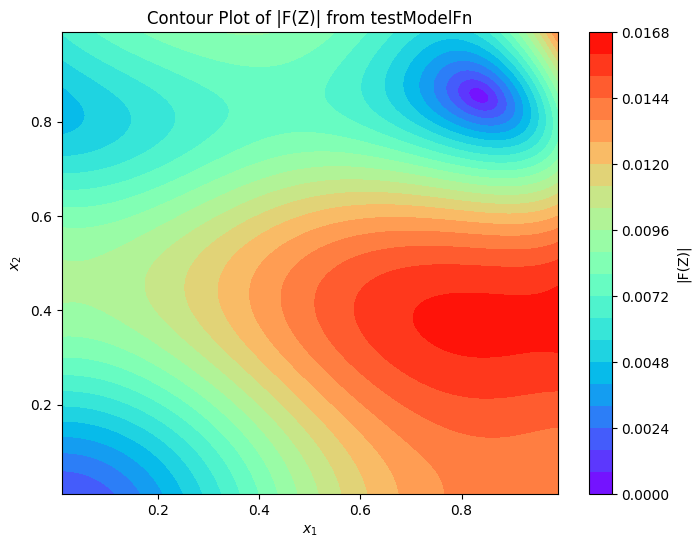

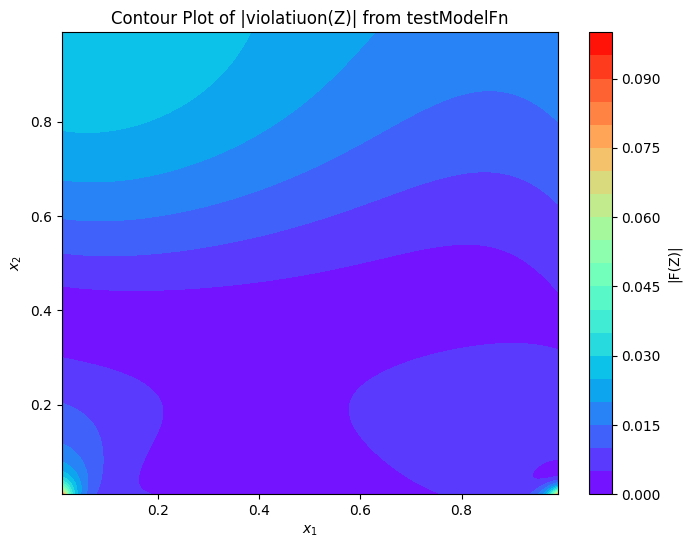

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import torch



# Create a grid of x1 and x2 values
x1 = np.linspace(0.01, .99, 400)
x2 = np.linspace(0.01, .99, 400)
X1, X2 = np.meshgrid(x1, x2)

# Flatten the grid and create a PyTorch tensor
Z_flat = torch.tensor(np.c_[X1.ravel(), X2.ravel()], dtype=torch.float32)

with torch.no_grad():
# Compute F(Z) using testModelFn
    F_Z = model(Z_flat)

viol=compute_crossing_violation( testModelFn, Z_flat, 1/2)
# Compute the absolute value of F(Z)
abs_F_Z = torch.sqrt(F_Z[:, 0]**2 + F_Z[:, 1]**2).reshape(X1.shape)
abs_viol= torch.sqrt(viol[:, 0]**2 + viol[:, 1]**2).reshape(X1.shape)

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, abs_F_Z.numpy(), levels=20, cmap="rainbow")
plt.colorbar(contour, label="|F(Z)|")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Contour Plot of |F(Z)| from testModelFn")
plt.show()



# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, abs_viol.numpy(), levels=20, cmap="rainbow")
plt.colorbar(contour, label="|F(Z)|")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Contour Plot of |violatiuon(Z)| from testModelFn")
plt.show()


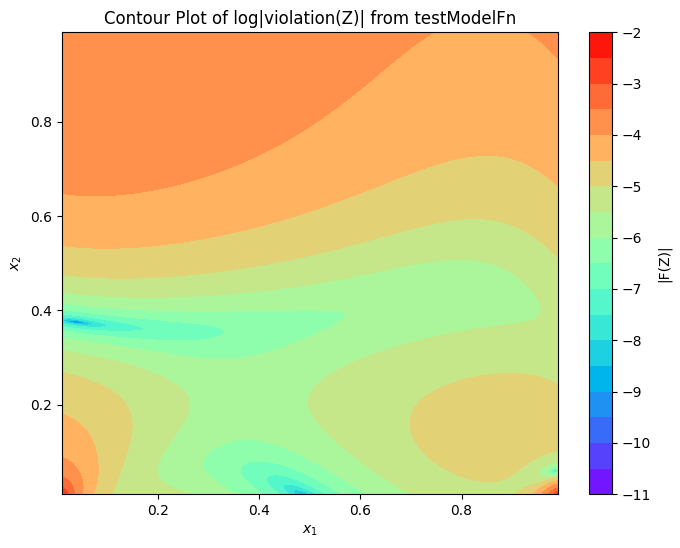

In [86]:
abs_viol_log= torch.log(torch.sqrt(viol[:, 0]**2 + viol[:, 1]**2).reshape(X1.shape))

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, abs_viol_log.numpy(), levels=20, cmap="rainbow")
plt.colorbar(contour, label="|F(Z)|")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Contour Plot of log|violation(Z)| from testModelFn")
plt.show()

In [66]:
model(Z)

tensor([[ 1.7314e-03,  8.2026e-03],
        [-1.5418e-02,  2.3043e-03],
        [-9.6821e-03,  3.7006e-03],
        [-1.5418e-02,  2.5601e-03],
        [ 2.8948e-03,  7.5485e-03],
        [ 2.5372e-03,  7.5901e-03],
        [-5.3187e-03,  2.6687e-03],
        [-1.5491e-02,  2.9869e-03],
        [-1.1683e-02,  3.8074e-03],
        [-8.3480e-03,  3.3069e-04],
        [-6.4869e-03,  2.2995e-03],
        [-1.5423e-02, -7.7551e-04],
        [ 1.5723e-03,  5.9047e-03],
        [ 3.7296e-04,  7.9825e-03],
        [-1.6020e-02, -2.6328e-03],
        [-9.2168e-03, -9.8081e-04],
        [-8.3988e-03, -1.1957e-03],
        [-4.8094e-03,  2.1617e-03],
        [-1.6012e-02,  1.7289e-03],
        [ 2.7742e-03,  7.3595e-03],
        [-1.0560e-02,  2.5190e-03],
        [-1.2026e-02,  3.2865e-03],
        [-1.5495e-02, -4.8027e-03],
        [-1.1963e-02,  4.1094e-03],
        [-1.0660e-02,  4.0970e-03],
        [-2.4200e-04,  7.3134e-03],
        [-2.5574e-03, -7.7804e-03],
        [-1.3104e-02, -1.886

In [65]:
F_Z

tensor([[-0.0015, -0.0004],
        [-0.0015, -0.0004],
        [-0.0015, -0.0003],
        ...,
        [ 0.0116, -0.0064],
        [ 0.0117, -0.0065],
        [ 0.0119, -0.0067]])

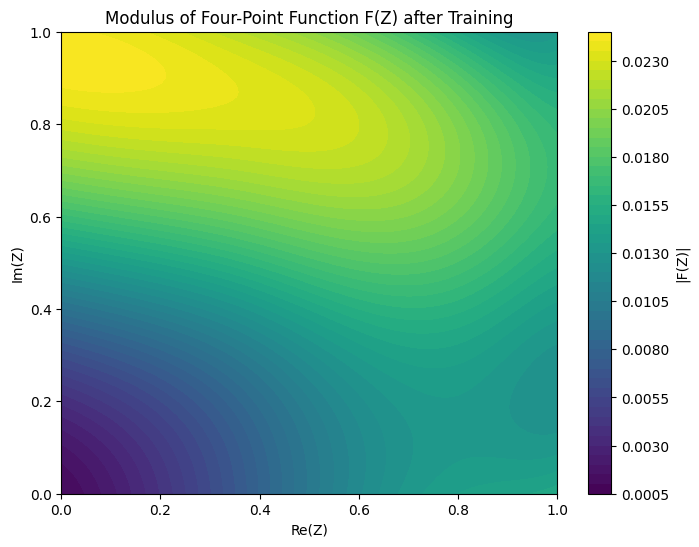

In [63]:
plt.figure(figsize=(8, 6))
contour_f = plt.contourf(Re_Z_grid_np, Im_Z_grid_np, F_Z_modulus_np, levels=50, cmap='viridis')
plt.colorbar(contour_f, label='|F(Z)|')
plt.xlabel('Re(Z)')
plt.ylabel('Im(Z)')
plt.title('Modulus of Four-Point Function F(Z) after Training')
plt.show()

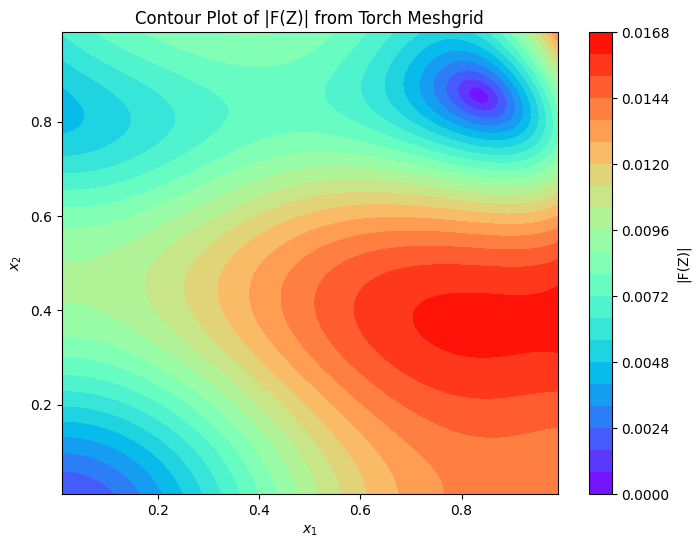

In [84]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define grid parameters
grid_size = 400  # Match the second snippet's grid size
Re_min, Re_max = 0.01, 0.99
Im_min, Im_max = 0.01, 0.99

# Generate grid using torch.meshgrid with 'ij' indexing
Re_Z = torch.linspace(Re_min, Re_max, grid_size)
Im_Z = torch.linspace(Im_min, Im_max, grid_size)
Re_Z_grid, Im_Z_grid = torch.meshgrid(Re_Z, Im_Z, indexing='ij')
Z_grid = torch.stack([Re_Z_grid.flatten(), Im_Z_grid.flatten()], dim=-1)

# Compute F(Z) on the grid
model.eval()
with torch.no_grad():
    F_Z_grid = model(Z_grid)  # Shape: (grid_size**2, 2)

# Compute the modulus of F(Z)
F_Z_modulus = complex_abs(F_Z_grid).reshape(grid_size, grid_size)

# Convert grids to NumPy for plotting
Re_Z_grid_np = Re_Z_grid.numpy()
Im_Z_grid_np = Im_Z_grid.numpy()

# Plot the contour similar to the second snippet
plt.figure(figsize=(8, 6))
contour = plt.contourf(Re_Z_grid_np, Im_Z_grid_np, F_Z_modulus.numpy(), levels=20, cmap="rainbow")
plt.colorbar(contour, label="|F(Z)|")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Contour Plot of |F(Z)| from Torch Meshgrid")
plt.show()


tensor([[-0.0009, -0.0003],
        [-0.0010, -0.0003],
        [-0.0010, -0.0003],
        ...,
        [-0.0090, -0.0103],
        [-0.0085, -0.0105],
        [-0.0080, -0.0108]])

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# -----------------------------
# Step 1: Read the CSV File
# -----------------------------
# Function to convert scientific notation from '1.52995e6' or '1.52995*10^6' to float
def convert_scientific_notation(val):
    if isinstance(val, str):
        # Replace '*10^' with 'e' to conform with Python's scientific notation
        val = val.replace('*10^', 'e').replace('*10**', 'e')
    try:
        return float(val)
    except ValueError:
        print(f"Could not convert value: {val}")
        return np.nan

# Read the CSV with proper conversion
coeff_df = pd.read_csv('coefficients_standard.csv', converters={'c_nm': convert_scientific_notation})

# Verify the data is read correctly
print("First few rows of the coefficients DataFrame:")
print(coeff_df.head())

# Drop any rows with NaN in 'c_nm' due to conversion errors
coeff_df.dropna(subset=['c_nm'], inplace=True)

# -----------------------------
# Step 2: Define the Grid for Z and Zb
# -----------------------------
# Define the range and resolution
# Adjust the ranges based on your specific function's behavior
Z_min, Z_max, Z_points = -1.0, 1.0, 500
Zb_min, Zb_max, Zb_points = -1.0, 1.0, 500

# Create linearly spaced values for Z and Zb
Z = np.linspace(Z_min, Z_max, Z_points)
Zb = np.linspace(Zb_min, Zb_max, Zb_points)

# Create a meshgrid for Z and Zb
Z_grid, Zb_grid = np.meshgrid(Z, Zb)

# -----------------------------
# Step 3: Initialize F(Z, Zb)
# -----------------------------
F_ZZb = np.zeros_like(Z_grid, dtype=np.float64)

# -----------------------------
# Step 4: Compute F(Z, Zb)
# -----------------------------
# Vectorized computation for efficiency
for index, row in coeff_df.iterrows():
    n = row['n']
    m = row['m']
    c_nm = row['c_nm']
    
    # Compute (-1/2 + Z)^n and (-1/2 + Zb)^m
    # Use np.power for better performance and handling
    term_Z = np.power(-0.5 + Z_grid, n)
    term_Zb = np.power(-0.5 + Zb_grid, m)
    
    # Multiply by the coefficient and add to F_ZZb
    F_ZZb += c_nm * term_Z * term_Zb

# -----------------------------
# Step 5: Define Threshold for Crossing Violations
# -----------------------------
# Adjust this threshold based on your specific requirements
threshold = 1e6  # Example threshold

# Identify where the function exceeds the threshold
crossing_violation = F_ZZb > threshold

# -----------------------------
# Step 6: Plotting
# -----------------------------

# 6.1: Contour Plot of F(Z, Zb)
plt.figure(figsize=(12, 6))
# Use logarithmic normalization if F_ZZb spans multiple orders of magnitude
norm = colors.Normalize(vmin=np.min(F_ZZb), vmax=np.max(F_ZZb))
contour1 = plt.contourf(Z_grid, Zb_grid, F_ZZb, levels=100, cmap='viridis', norm=norm)
plt.title('Contour Plot of F(Z, Zb)')
plt.xlabel('Z')
plt.ylabel('Zb')
plt.colorbar(contour1, label='F(Z, Zb)')
plt.tight_layout()
plt.savefig('F_ZZb_Contour.png', dpi=300)
plt.show()

# 6.2: Contour Plot of Crossing Violations
plt.figure(figsize=(12, 6))
# Create a binary mask: 1 where violation occurs, 0 otherwise
violation_mask = crossing_violation.astype(int)

# Define custom colormap: white for no violation, red for violation
from matplotlib.colors import ListedColormap
cmap_violation = ListedColormap(['white', 'red'])

# Plot the violation mask
contour2 = plt.contourf(Z_grid, Zb_grid, violation_mask, levels=[-0.5, 0.5, 1.5], colors=['white', 'red'], alpha=0.6)
plt.title(f'Contour Plot of Crossing Violations (F(Z, Zb) > {threshold})')
plt.xlabel('Z')
plt.ylabel('Zb')
plt.colorbar(contour2, ticks=[0,1], label='Violation (1=True, 0=False)')
plt.tight_layout()
plt.savefig('Crossing_Violations_Contour.png', dpi=300)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'coefficients_standard.csv'

In [84]:
from kan import *
import matplotlib.pyplot as plt
from torch import autograd
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

dim = 2
np_i = 21 # number of interior points (along each dimension)
np_b = 21 # number of boundary points (along each dimension)
ranges = [-1, 1]

model = KAN(width=[2,2,1], grid=5, k=3, seed=1, device=device)

def batch_jacobian(func, x, create_graph=False):
    # x in shape (Batch, Length)
    def _func_sum(x):
        return func(x).sum(dim=0)
    return autograd.functional.jacobian(_func_sum, x, create_graph=create_graph).permute(1,0,2)

# define solution
sol_fun = lambda x: torch.sin(torch.pi*x[:,[0]])*torch.sin(torch.pi*x[:,[1]])
source_fun = lambda x: -2*torch.pi**2 * torch.sin(torch.pi*x[:,[0]])*torch.sin(torch.pi*x[:,[1]])

# interior
sampling_mode = 'random' # 'radnom' or 'mesh'

x_mesh = torch.linspace(ranges[0],ranges[1],steps=np_i)
y_mesh = torch.linspace(ranges[0],ranges[1],steps=np_i)
X, Y = torch.meshgrid(x_mesh, y_mesh, indexing="ij")
if sampling_mode == 'mesh':
    #mesh
    x_i = torch.stack([X.reshape(-1,), Y.reshape(-1,)]).permute(1,0)
else:
    #random
    x_i = torch.rand((np_i**2,2))*2-1
    
x_i = x_i.to(device)

# boundary, 4 sides
helper = lambda X, Y: torch.stack([X.reshape(-1,), Y.reshape(-1,)]).permute(1,0)
xb1 = helper(X[0], Y[0])
xb2 = helper(X[-1], Y[0])
xb3 = helper(X[:,0], Y[:,0])
xb4 = helper(X[:,0], Y[:,-1])
x_b = torch.cat([xb1, xb2, xb3, xb4], dim=0)

x_b = x_b.to(device)


alpha = 0.01
log = 1

def train(steps):
    optimizer = LBFGS(model.parameters(), lr=1, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32, tolerance_ys=1e-32)

    pbar = tqdm(range(steps), desc='description', ncols=100)

    for _ in pbar:
        def closure():
            global pde_loss, bc_loss
            optimizer.zero_grad()
            # interior loss
            sol = sol_fun(x_i)
            sol_D1_fun = lambda x: batch_jacobian(model, x, create_graph=True)[:,0,:]
            sol_D1 = sol_D1_fun(x_i)
            sol_D2 = batch_jacobian(sol_D1_fun, x_i, create_graph=True)[:,:,:]
            lap = torch.sum(torch.diagonal(sol_D2, dim1=1, dim2=2), dim=1, keepdim=True)
            source = source_fun(x_i)
            pde_loss = torch.mean((lap - source)**2)

            # boundary loss
            bc_true = sol_fun(x_b)
            bc_pred = model(x_b)
            bc_loss = torch.mean((bc_pred-bc_true)**2)

            loss = alpha * pde_loss + bc_loss
            loss.backward()
            return loss

        if _ % 5 == 0 and _ < 50:
            model.update_grid_from_samples(x_i)

        optimizer.step(closure)
        sol = sol_fun(x_i)
        loss = alpha * pde_loss + bc_loss
        l2 = torch.mean((model(x_i) - sol)**2)

        if _ % log == 0:
            pbar.set_description("pde loss: %.2e | bc loss: %.2e | l2: %.2e " % (pde_loss.cpu().detach().numpy(), bc_loss.cpu().detach().numpy(), l2.cpu().detach().numpy()))

train(10)

 
model.fix_symbolic(0,0,0,'x')
model.fix_symbolic(0,0,1,'x')
model.fix_symbolic(0,1,0,'x')
model.fix_symbolic(0,1,1,'x')
model.fix_symbolic(1,0,0,'cos')
model.fix_symbolic(1,1,0,'cos')

train(20)



cpu
checkpoint directory created: ./model
saving model version 0.0


pde loss: 1.13e+01 | bc loss: 3.13e-02 | l2: 3.40e-02 : 100%|███████| 10/10 [00:06<00:00,  1.53it/s]


r2 is 0.9479081630706787
saving model version 0.1
r2 is 0.5036885738372803
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.2
Best value at boundary.
r2 is 0.9984145164489746
saving model version 0.3
r2 is 0.9979383945465088
saving model version 0.4
Best value at boundary.
r2 is 0.20854441821575165
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.5
Best value at boundary.
r2 is 0.780783474445343
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.6


pde loss: 4.54e+01 | bc loss: 1.25e-01 | l2: 1.10e-01 : 100%|███████| 20/20 [00:04<00:00,  4.16it/s]


In [66]:
train(100)


pde loss: 4.06e+01 | bc loss: 8.79e-02 | l2: 1.13e-01 : 100%|█████| 100/100 [00:15<00:00,  6.56it/s]


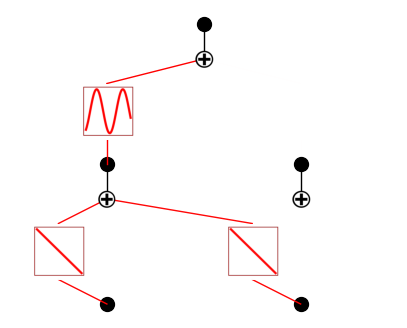

In [87]:
model.plot()


In [86]:
formula = model.symbolic_formula()[0][0]
ex_round(formula,6)

-0.714554*cos(0.000488*x_1 + 0.000465*x_2 - 2.145118) + 0.508431*cos(2.879349*x_1 + 2.922501*x_2 - 3.144079) - 0.403756

In [15]:
model.fix_symbolic(0,0,0,'x')
model.fix_symbolic(0,0,1,'x')
model.fix_symbolic(0,1,0,'x')
model.fix_symbolic(0,1,1,'x')

r2 is 0.9133176803588867
saving model version 0.1
r2 is 0.35137179493904114
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.2
r2 is 0.9993053674697876
saving model version 0.3
r2 is 0.9980694055557251
saving model version 0.4


tensor(0.9981)

In [16]:
train()


pde loss: 1.49e+01 | bc loss: 2.16e-02 | l2: 1.26e-01 : 100%|███████| 20/20 [00:13<00:00,  1.50it/s]


In [18]:
formula = model.symbolic_formula()[0][0]


In [79]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','cos','abs']
model.auto_symbolic(lib=lib)
model.symbolic_formula()

skipping (0,0,0) since already symbolic
skipping (0,0,1) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,1,1) since already symbolic
skipping (1,0,0) since already symbolic
skipping (1,1,0) since already symbolic
saving model version 0.2


([0.0363698538127286*x_2 - 0.019381210509673*sin(1.74199986457825*x_1 - 3.60151982307434) + 0.0253714245806292*sin(3.51487994194031*x_1 - 9.01119995117188) + 0.0883266454745177],
 [x_1, x_2])

In [59]:
model.symbolic_formula()

([0.359288722276688*sin(-1.43522207476836*x_1 + 3.27501235269807*x_2 + 1.53940449911575) - 0.369220018386841*sin(3.66403996551253*x_1 - 2.636199868199*x_2 + 4.74787693424931) + 0.113709829747677],
 [x_1, x_2])

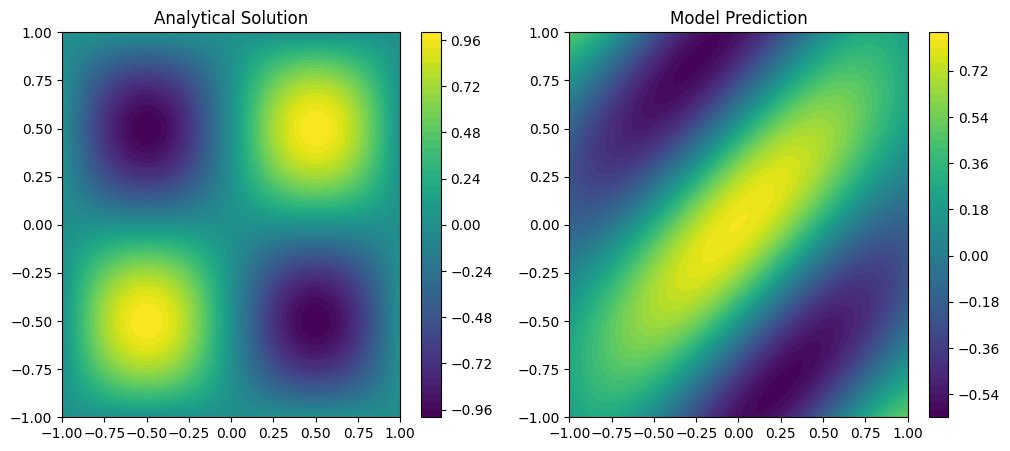

In [83]:
import matplotlib.pyplot as plt

def plot_results():
    # Generate a grid over the domain [-1, 1] x [-1, 1]
    x = torch.linspace(ranges[0], ranges[1], steps=100)
    y = torch.linspace(ranges[0], ranges[1], steps=100)
    X, Y = torch.meshgrid(x, y, indexing='ij')
    grid = torch.stack([X.reshape(-1,), Y.reshape(-1,)], dim=1).to(device)
    
    with torch.no_grad():
        # Compute the analytical solution
        Z_sol = sol_fun(grid).cpu().reshape(100, 100)
        # Compute the model's prediction
        Z_model = model(grid).cpu().reshape(100, 100)
    
    # Plot the analytical solution
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.contourf(X.cpu(), Y.cpu(), Z_sol, levels=50, cmap='viridis')
    plt.colorbar()
    plt.title('Analytical Solution')
    
    # Plot the model's prediction
    plt.subplot(1, 2, 2)
    plt.contourf(X.cpu(), Y.cpu(), Z_model, levels=50, cmap='viridis')
    plt.colorbar()
    plt.title('Model Prediction')
    plt.show()

# Call the plot_results function after training

plot_results()


In [95]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 13 20:39:24 2024

@author: User
"""

from scipy.special import hyp2f1
import numpy as np
import mpmath as mp

def get_spec_in_2D(delta_list):
    spec = []
    for s in range(0, max(delta_list)+1, 2):
        delta = [ele for ele in delta_list if ele>=s]
        spec.append([s, delta])
    return spec

class CFT_2D:
    def __init__(self, d_phi):
        self.d_phi = d_phi

    def g_spec(self, z, zb, spec_list):
        # pre_f = 1 if s !=0 else 1/2
        def pre_f(s):
            return 1 if s !=0 else 1/2
        
        # Vectorized calculation using numpy
        return np.array([pre_f(s)*
                (z**((d+s)/2) * zb**((d-s)/2) * hyp2f1((d+s)/2, (d+s)/2, (d+s), z) * hyp2f1((d-s)/2, (d-s)/2, (d-s), zb) +
                zb**((d+s)/2) * z**((d-s)/2) * hyp2f1((d+s)/2, (d+s)/2, (d+s), zb) * hyp2f1((d-s)/2, (d-s)/2, (d-s), z)) 
                for s, d in spec_list
                ])
    
    def G(self, z_list, zb_list, spec_list):
        return np.array((np.abs(z_list-1)**(2*self.d_phi)) * self.g_spec(z_list, zb_list, spec_list) - 
                        np.abs(z_list)**(2*self.d_phi) * self.g_spec(1-z_list, 1-zb_list, spec_list)).T
    
    def vacuum(self, z_list):
        return np.array(np.abs(z_list-1)**(2*self.d_phi)-np.abs(z_list)**(2*self.d_phi))
    
    @staticmethod
    def calc_identical_error_v1(mtx):
        mtx = mp.matrix(mtx)
        inverse = mtx**-1
        identical = mtx*inverse
        
        err = identical-mp.eye(len(mtx))
        # print(np.max(np.abs(err.tolist())))
        
        return identical, np.max(np.abs(err.tolist()))
    
    def c_sampling(self, z_list, zb_list, spec_list):
        num_sampling = 10
        num_z_partition = int(len(z_list)/len(spec_list))
        cs=[]
        err = []

        sys_list = self.G(z_list, zb_list, spec_list)
        for _ in range(num_sampling):
            inds = np.random.randint(num_z_partition, size=1)+[ii*num_z_partition for ii in range(len(spec_list))]
            A = mp.matrix(sys_list[inds])
            #err.append(self.calc_identical_error_v1(A)[1])
            sol = (A**-1) * (mp.matrix(-self.vacuum(z_list)[inds]))
            if len(sol) != 0:
                cs.append(np.array([ float(e[0].real) for e in sol.tolist()]))
        c_mean = np.mean(cs, axis=0)
        c_std = np.std(cs, axis=0)
        
        return c_mean, c_std#, cs#, np.mean(err)
    
    
    

if __name__ == '__main__':
    d_phi = 1/8
    x_list = np.linspace(0.4, 0.49, 400)
    xb_list = np.linspace(0.0j, 0.0j, 70)
    
    z_list = np.array(x_list)
    zb_list = np.array(x_list)
    spec_list = [[0, 1], [2, 2], [0, 4], [6, 6]]
    #spec_list = [[0, 1], [0, 4], [2, 2], [2, 6], [4, 4], [4, 5], [6, 6]]
    cft = CFT_2D(d_phi)
    
    c_result = cft.c_sampling(z_list, zb_list, spec_list)
    print('C: ', c_result[0], '\nstd: ', c_result[1])#, '\nmtx inversion err: ', c_result[3])
    # for i in np.linspace(0.1, 2, 20):
    #     spec_list = [[0, i], [2, 2], [0, 4], [4, 4], [4, 5], [2, 6], [6, 6]]
    #     # spec_list = [[2, 2], [0, 3], [0, 4], [4, 4], [2, 5], [2, 6], [6, 6]]
    #     # spec_list = [[0, 1], [2, 2], [0, 4], [4, 4], [6, 6]]
    #     cft = CFT_2D(d_phi, spec_list, z_list, zb_list)
        
    #     c_result = cft.c_sampling()
    #     # print('C: ', c_result[0], '\nstd: ', c_result[1], '\nmtx inversion err: ', c_result[3])
    #     print(f'{i :.1f} std: ', c_result[1])

C:  [2.49934623e-01 1.56497910e-02 6.92546268e-04 1.46014270e-05] 
std:  [1.65657336e-06 6.84807436e-07 2.90534355e-07 2.77229226e-08]
